In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from typing import Callable, Tuple, List
import warnings
warnings.filterwarnings('ignore')

CHARGEMENT ET OBSERVATION DES DONNÉES

In [45]:
df = load_breast_cancer(as_frame=True).frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [42]:
print(f"\nColonnes disponibles: {list(df.columns)}")
print(f"\nTypes de données:")
df.dtypes


Colonnes disponibles: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

Types de données:


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

NETTOYAGE DES DONNEES

In [46]:
print(f"Distribution des classes:")
print(df["target"].value_counts())

Distribution des classes:
target
1    357
0    212
Name: count, dtype: int64


In [50]:
# Préparer X et Y
# Supprimer les colonnes non pertinentes

X = df.drop(columns=["target"])
Y = df["target"].map({1: 1, 0: -1})  # Convertir les valeurs de Y en -1 et 1
print(f"\nShape de X: {X.shape}")
print(f"Shape de Y: {Y.shape}")


Shape de X: (569, 30)
Shape de Y: (569,)


0   -1
1   -1
2   -1
3   -1
4   -1
Name: target, dtype: int64

In [51]:
# Split train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"\nShape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de Y_train: {Y_train.shape}")
print(f"Shape de Y_test: {Y_test.shape}")


Shape de X_train: (455, 30)
Shape de X_test: (114, 30)
Shape de Y_train: (455,)
Shape de Y_test: (114,)


In [59]:
# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# 4. Ajout du Biais
n_train = X_train.shape[0]
n_test = X_test.shape[0]

X_train_biais = np.hstack((X_train, np.ones((n_train, 1))))
X_test_biais = np.hstack((X_test, np.ones((n_test, 1))))

PHASE 1: FONDEMENTS ET GRADIENT DÉTERMINISTE

    Compilation de la descente de gradient

In [72]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, w, lambda_reg):
    n = X.shape[0]
    # Application de la formule (1)
    z = y * (X @ w)
    loss = (1/n) * np.sum(np.log(1 + np.exp(-z))) + (lambda_reg/2) * np.linalg.norm(w)**2
    return loss

def compute_gradient(X, y, w, lambda_reg):
    n = X.shape[0]
    # Calcul vectorisé du gradient dérivé en Q2 
    # z = y_i * (x_i . w)
    z = y * (X @ w) 
    
    # Le terme dans la somme : -y_i * x_i / (1 + exp(z))
    # Cela revient à : -y_i * x_i * sigmoid(-z)
    coeffs = -y * sigmoid(-z) # Vecteur de taille (n, 1)
    
    grad_loss = (1/n) * (X.T @ coeffs) 
    grad_reg = lambda_reg * w
    
    return grad_loss + grad_reg

def gradient_descent(X, y, lambda_reg, learning_rate, max_iter=1000, tol=1e-4):
    d = X.shape[1]
    w = np.zeros(d) # Initialisation
    history = []
    
    for i in range(max_iter):
        grad = compute_gradient(X, y, w, lambda_reg)
        
        # Mise à jour du poids (Pas fixe)
        w = w - learning_rate * grad
        
        # Sauvegarde pour les courbes 
        loss = compute_loss(X, y, w, lambda_reg)
        history.append(loss)
        
        # Condition d'arrêt
        if np.linalg.norm(grad) < tol:
            print(f"Convergence atteinte à l'itération {i}")
            break
            
    return w, history

def calculate_lipschitz_constant(X, lambda_reg):
    n = X.shape[0]

    # On utilise np.linalg.norm avec ord=2 pour la norme spectrale (norme 2 matricielle)
    spectral_norm = np.linalg.norm(X, ord=2)
    
    #Application de la formule : L = (||X||^2 / 4n) + lambda
    L = (spectral_norm**2) / (4 * n) + lambda_reg
    return L

# Exemple d'utilisation dans votre projet :
L = calculate_lipschitz_constant(X_train_biais, lambda_reg)

# Le pas de gradient théorique optimal est souvent choisi comme :
pas_optimal = 1 / L

Constante de Lipschitz L : 3.3627


Visualisation de la convergence 

Convergence atteinte à l'itération 150


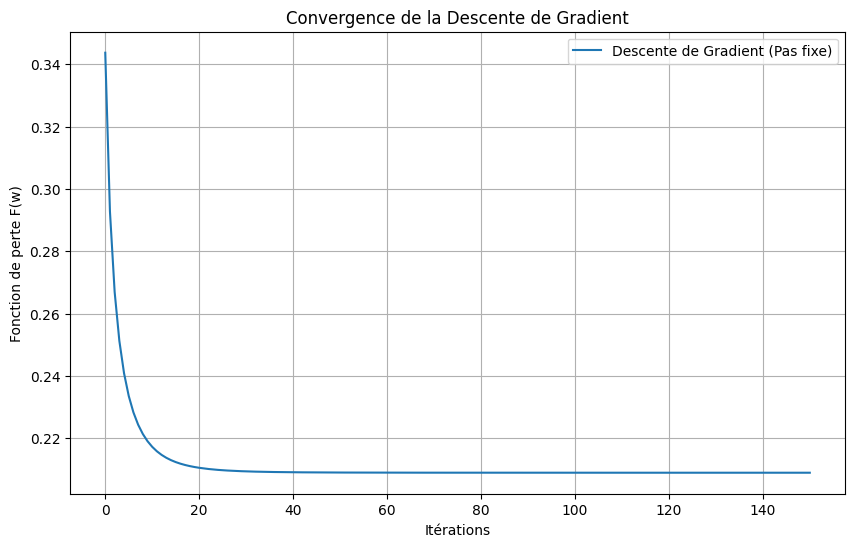

In [73]:
lambda_reg = 0.1
learning_rate = pas_optimal
w_opt, loss_history = gradient_descent(X_train_biais, Y_train, lambda_reg, learning_rate)

plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Descente de Gradient (Pas fixe)')
plt.xlabel('Itérations')
plt.ylabel('Fonction de perte F(w)')
plt.title('Convergence de la Descente de Gradient')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
from scipy.optimize import minimize
import time

#Définition de l'objectif pour Scipy (doit prendre w comme 1er argument)
def objective_function(w, X, y, lbda):
    return compute_loss(X, y, w, lbda)

def gradient_function(w, X, y, lbda):
    return compute_gradient(X, y, w, lbda)

# Callback pour enregistrer l'historique de la perte
history_cg = []
def callback_cg(w):
    loss = objective_function(w, X_train_biais, Y_train, lambda_reg)
    history_cg.append(loss)

# Exécution du Gradient Conjugué
w0 = np.zeros(X_train_biais.shape[1]) # Point de départ identique
start_time = time.time()

res = minimize(
    fun=objective_function,
    x0=w0,
    args=(X_train_biais, Y_train, lambda_reg),
    jac=gradient_function, # On fournit le gradient calculé à la main (Phase 1, Q2)
    method='CG',           # Méthode du Gradient Conjugué 
    callback=callback_cg,
    options={'disp': True}
)

end_time = time.time()
print(f"Temps d'exécution CG: {end_time - start_time:.4f}s")

Optimization terminated successfully.
         Current function value: 0.208920
         Iterations: 12
         Function evaluations: 23
         Gradient evaluations: 23
Temps d'exécution CG: 0.0736s


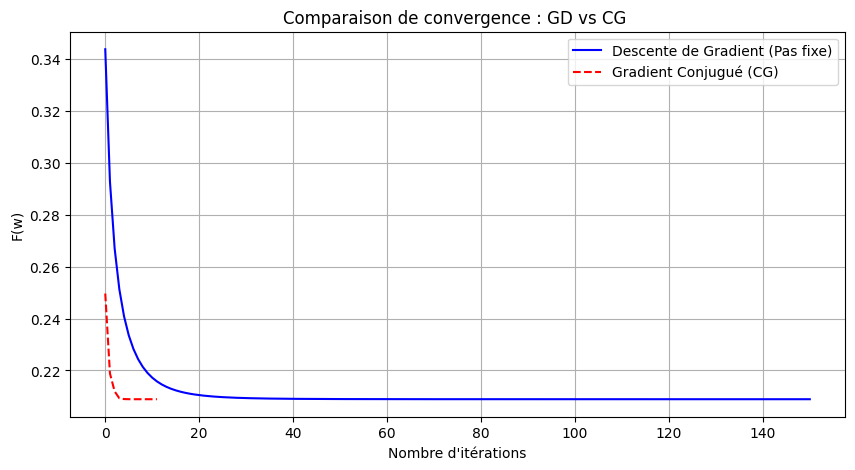

In [75]:
plt.figure(figsize=(10, 5))

# Courbe de votre Descente de Gradient (Pas fixe)
plt.plot(loss_history, label='Descente de Gradient (Pas fixe)', color='blue')

# Courbe du Gradient Conjugué de Scipy
plt.plot(history_cg, label='Gradient Conjugué (CG)', color='red', linestyle='--')

plt.xlabel('Nombre d\'itérations')
plt.ylabel('F(w)')
plt.title('Comparaison de convergence : GD vs CG ')
plt.legend()
plt.grid(True)
plt.show()

PHASE 2 : PASSAGE A L'ECHELLE STOCHASTIQUE 

    Gradient Stochastique

In [86]:

def sgd_logistic(X, y, lambda_reg, alpha0=0.1, gamma=0.01, n_epochs=50):
    n, d = X.shape
    w = np.zeros(d)
    history_sgd = []
    
    # k suit le nombre total de mises à jour (itérations)
    k = 0 
    
    for epoch in range(n_epochs):
        # On mélange les données à chaque époque
        indices = np.random.permutation(n)
        
        for i in indices:
            # Sélection d'un seul échantillon
            xi = X[i, :].reshape(1, -1)
            yi = y[i]
            
            # Calcul du pas décroissant (alpha_k)
            # Règle de décroissance mentionnée [cite: 17, 18]
            alpha_k = alpha0 / (1 + gamma * k)

            # Gradient stochastique (uniquement pour le point i)
            zi = yi * (xi @ w)
            # Utilisation de la formule dérivée en Phase 1 [cite: 12]
            grad_i = -yi * xi / (1 + np.exp(zi)) + lambda_reg * w
            
            # Mise à jour
            w = w - alpha_k * grad_i.flatten()
            
            k += 1
            
        # Calcul de la perte sur tout le set pour le suivi (optionnel)
        loss = compute_loss(X, y, w, lambda_reg)
        history_sgd.append(loss)
        
    return w, history_sgd

In [103]:
# Paramètres communs
lambda_reg = 0.1
n_epochs = 50

# Exécution du SGD (Phase 2)
X_train_np = np.array(X_train_biais)
Y_train_np = np.array(Y_train)

w_sgd, history_sgd = sgd_logistic(
    X_train_np, Y_train_np, lambda_reg, 
    alpha0=0.2, gamma=0.001, n_epochs=n_epochs
)

# Exécution du GD à pas fixe (Phase 1) pour comparaison
# Pour le GD, une itération = une époque (calcul sur n points)
w_gd, history_gd = gradient_descent(
    X_train_biais, Y_train, lambda_reg, 
    learning_rate=1/L, max_iter=n_epochs
)

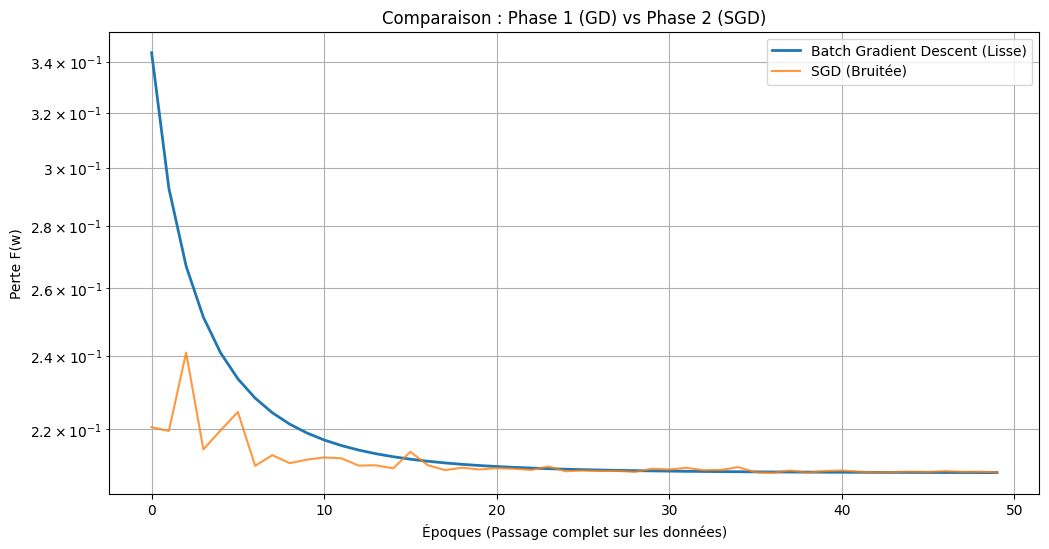

In [104]:
plt.figure(figsize=(12, 6))

# Courbe GD (Déterministe)
plt.plot(range(len(history_gd)), history_gd, label='Batch Gradient Descent (Lisse)', linewidth=2)

# Courbe SGD (Stochastique)
plt.plot(range(len(history_sgd)), history_sgd, label='SGD (Bruitée)', alpha=0.8)

plt.yscale('log')
plt.xlabel('Époques (Passage complet sur les données)')
plt.ylabel('Perte F(w)')
plt.title('Comparaison : Phase 1 (GD) vs Phase 2 (SGD)')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()

    Optimisateurs Modernes

In [113]:
from scipy.special import expit

def modern_optimizers_refined(X, y, lambda_reg, method='adam', alpha=0.001, n_epochs=50):
    X = np.asanyarray(X)
    y = np.asanyarray(y).flatten()
    n, d = X.shape
    w = np.zeros(d)
    history = []
    
    # Paramètres standards
    beta1 = 0.9   # Pour Adam (Momentum)
    beta2 = 0.999 # Pour RMSProp/Adam (Moyenne carrée)
    eps = 1e-8
    
    m = np.zeros(d)
    v = np.zeros(d)
    
    t = 0
    for epoch in range(n_epochs):
        # Mélange des données à chaque époque
        indices = np.random.permutation(n)
        
        for i in indices:
            t += 1
            xi = X[i]
            yi = y[i]
            
            # 1. Calcul du gradient stochastique
            # Gradient de la log-loss + Gradient de la régularisation L2
            zi = yi * np.dot(xi, w)
            grad = -yi * xi * expit(-zi) + lambda_reg * w
            
            if method == 'rmsprop':
                # v = beta2 * v + (1 - beta2) * g^2
                v = beta2 * v + (1 - beta2) * (grad**2)
                w = w - alpha * grad / (np.sqrt(v) + eps)
                
            elif method == 'adam':
                # m = moyenne mobile du gradient (Momentum)
                m = beta1 * m + (1 - beta1) * grad
                # v = moyenne mobile du carré du gradient
                v = beta2 * v + (1 - beta2) * (grad**2)
                
                # Correction du biais (essentiel pour les premières itérations)
                m_hat = m / (1 - beta1**t)
                v_hat = v / (1 - beta2**t)
                
                w = w - alpha * m_hat / (np.sqrt(v_hat) + eps)
        
        # On enregistre la perte totale à la fin de chaque époque
        current_loss = compute_loss(X, y, w, lambda_reg)
        history.append(current_loss)
        
    return w, history

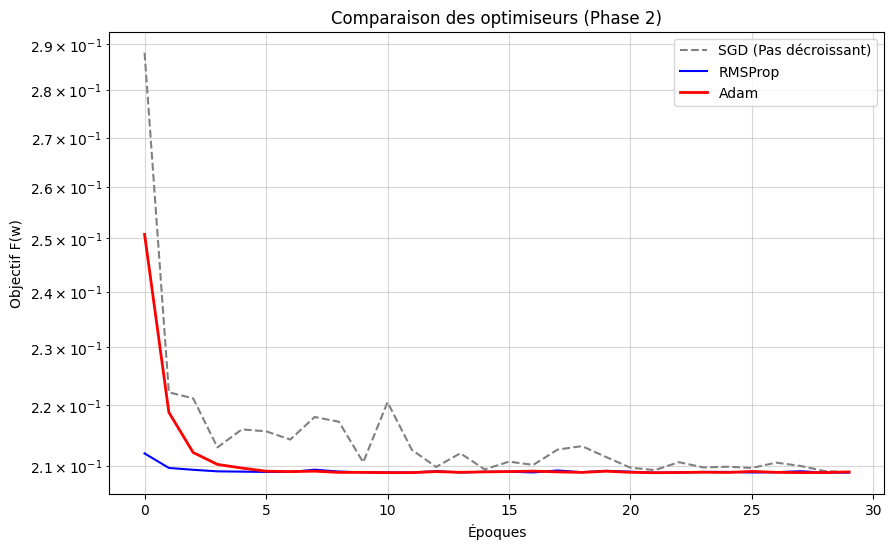

In [ ]:
# Paramètres
lbda = 0.1
epochs = 30

# Exécutions
w_sgd, hist_sgd = sgd_logistic(X_train_np, Y_train_np, lbda, alpha0=0.2, gamma=0.001, n_epochs=epochs)
w_rms, hist_rms = modern_optimizers_refined(X_train_np, Y_train_np, lbda, method='rmsprop', alpha=0.001, n_epochs=epochs)
w_adam, hist_adam = modern_optimizers_refined(X_train_np, Y_train_np, lbda, method='adam', alpha=0.001, n_epochs=epochs)

plt.figure(figsize=(10, 6))
plt.plot(hist_sgd, label='SGD (Pas décroissant)', color='gray', linestyle='--')
plt.plot(hist_rms, label='RMSProp', color='blue')
plt.plot(hist_adam, label='Adam', color='red', linewidth=2)

plt.yscale('log')
plt.xlabel('Époques')
plt.ylabel('Objectif F(w)')
plt.title('Comparaison des optimiseurs')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

PHASE 3 : NON-LISSE, PARCIMONIE ET PROXIMAL

    Implementation ISTA et FISTA

In [ ]:
def soft_thresholding(w, threshold):
    """ Opérateur proximal de la norme L1 """
    return np.sign(w) * np.maximum(0, np.abs(w) - threshold)

def compute_loss_l1(X, y, w, lambda_l1):
    """ Fonction objectif Phi(w) = f(w) + lambda * ||w||_1 """
    n = X.shape[0]
    z = y * (X @ w)
    log_loss = (1/n) * np.sum(np.log(1 + np.exp(-z)))
    l1_reg = lambda_l1 * np.linalg.norm(w, 1)
    return log_loss + l1_reg

def ista_fista(X, y, lambda_l1, L, n_iter=100, mode='fista'):
    n, d = X.shape
    w = np.zeros(d)
    w_prev = np.zeros(d)
    y_acc = np.zeros(d) # Variable intermédiaire pour l'accélération
    t = 1.0
    history = []
    
    step = 1.0 / L # Pas optimal théorique
    
    for k in range(n_iter):
        # Choix du point de gradient
        # Pour ISTA, on part de w. Pour FISTA, on part de y_acc (combinaison)
        point = y_acc if mode == 'fista' else w
        
        # Calcul du gradient de la partie LISSE (f) uniquement
        z = y * (X @ point)
        grad_f = (1/n) * X.T @ (-y * expit(-z))
        
        # Étape de gradient + Proximal (Seuil Doux)
        w_next = soft_thresholding(point - step * grad_f, step * lambda_l1)
        
        # Accélération de Nesterov (uniquement pour FISTA)
        if mode == 'fista':
            t_next = (1 + np.sqrt(1 + 4 * t**2)) / 2
            y_acc = w_next + ((t - 1) / t_next) * (w_next - w)
            t = t_next
        
        w = w_next
        history.append(compute_loss_l1(X, y, w, lambda_l1))
        
    return w, history

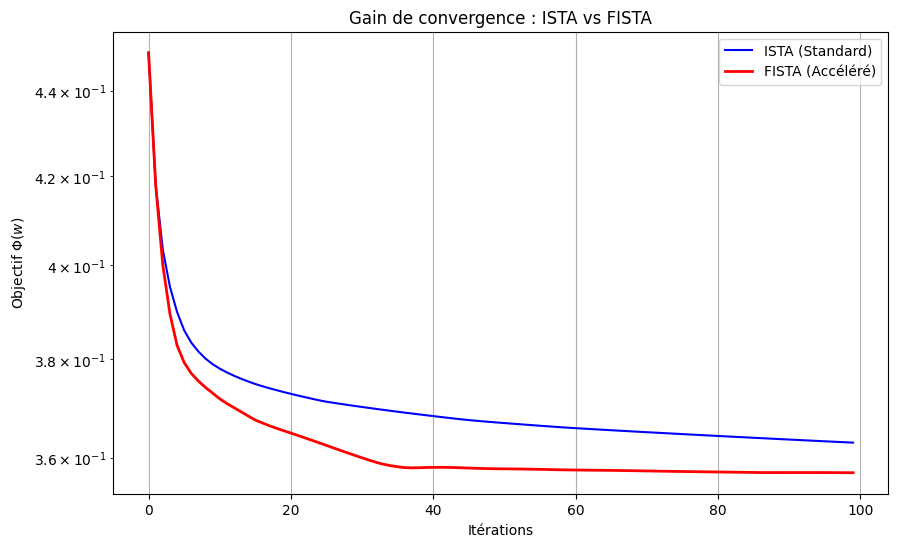

In [129]:
# On réutilise le L calculé précédemment (Phase 1 Q2)
L_const = calculate_lipschitz_constant(X_train_biais, 0) # lambda=0 ici car L1 est géré à part
lambda_l1 = 0.05

w_ista, hist_ista = ista_fista(X_train_biais, Y_train, lambda_l1, L_const, n_iter=100, mode='ista')
w_fista, hist_fista = ista_fista(X_train_biais, Y_train, lambda_l1, L_const, n_iter=100, mode='fista')

plt.figure(figsize=(10, 6))
plt.plot(hist_ista, label='ISTA (Standard)', color='blue')
plt.plot(hist_fista, label='FISTA (Accéléré)', color='red', linewidth=2)
plt.yscale('log')
plt.xlabel('Itérations')
plt.ylabel('Objectif $\Phi(w)$')
plt.title('Gain de convergence : ISTA vs FISTA')
plt.legend()
plt.grid(True)
plt.show()

    Parcimonie en fonction de lamda

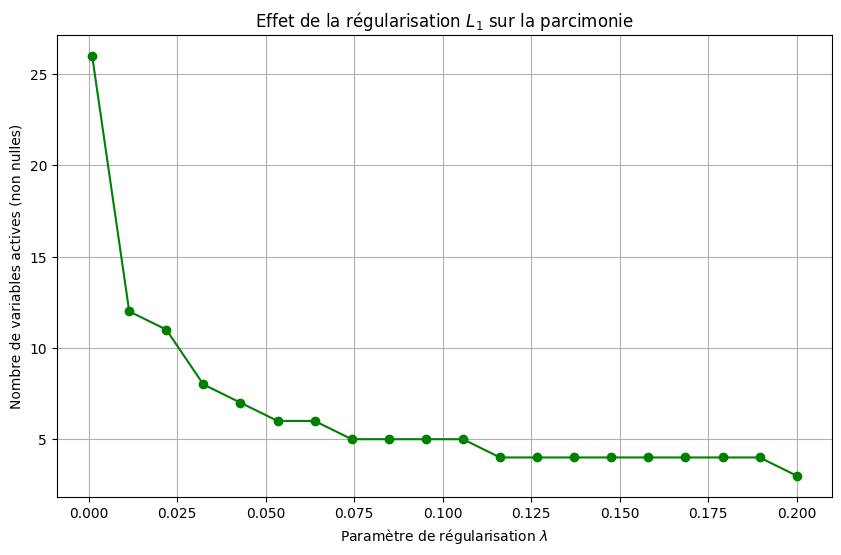

In [132]:
def parcimonie(X, y, L, lambdas):
    non_zero_counts = []
    
    for lbda in lambdas:
        # On utilise FISTA pour sa rapidité
        w_opt, _ = ista_fista(X, y, lbda, L, n_iter=200, mode='fista')
        
        # On compte les coefficients dont la valeur absolue est > 1e-5
        # (à cause des imprécisions numériques du zéro)
        count = np.sum(np.abs(w_opt) > 1e-5)
        non_zero_counts.append(count)
        
    return non_zero_counts

# Test sur une plage de lambdas
lambdas = np.linspace(0.001, 0.2, 20)
sparsity_counts = parcimonie(X_train_biais, Y_train, L_const, lambdas)

plt.figure(figsize=(10, 6))
plt.plot(lambdas, sparsity_counts, marker='o', linestyle='-', color='green')
plt.xlabel('Paramètre de régularisation $\lambda$')
plt.ylabel('Nombre de variables actives (non nulles)')
plt.title('Effet de la régularisation $L_1$ sur la parcimonie')
plt.grid(True)
plt.show()